In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch

In [53]:
path_csv = '/home/abhigith/Desktop/steel_defect_dataset/train.csv'   #complete path to csv data of images 
path_image_train = '/home/abhigith/Desktop/steel_defect_dataset/train_images/'  #complete path to training images
data_csv = pd.read_csv(path_csv)

In [54]:
data_csv.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [55]:
sample_img_id = data_csv['ImageId'][0]  #sample image for display

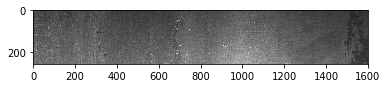

In [56]:
img = cv2.imread(path_image_train+sample_img_id)    #load the image to display
plt.imshow(img)

In [57]:
data_csv['EncodedPixels'].head(5)

0    29102 12 29346 24 29602 24 29858 24 30114 24 3...
1    18661 28 18863 82 19091 110 19347 110 19603 11...
2    37607 3 37858 8 38108 14 38359 20 38610 25 388...
3    131973 1 132228 4 132483 6 132738 8 132993 11 ...
4    229501 11 229741 33 229981 55 230221 77 230468...
Name: EncodedPixels, dtype: object

## Decoding the encodede pixels column

In [7]:
enc_pixels = data_csv['EncodedPixels'][0:3]

In [8]:
#test printing of encoded pixels
print("First five rows : \n", enc_pixels[0:5])
print("\nComplete elements of first row : ", enc_pixels[0])
print("\nShape : ", enc_pixels.shape)

First five rows : 
 0    29102 12 29346 24 29602 24 29858 24 30114 24 3...
1    18661 28 18863 82 19091 110 19347 110 19603 11...
2    37607 3 37858 8 38108 14 38359 20 38610 25 388...
Name: EncodedPixels, dtype: object

Complete elements of first row :  29102 12 29346 24 29602 24 29858 24 30114 24 30370 24 30626 24 30882 24 31139 23 31395 23 31651 23 31907 23 32163 23 32419 23 32675 23 77918 27 78174 55 78429 60 78685 64 78941 68 79197 72 79452 77 79708 81 79964 85 80220 89 80475 94 80731 98 80987 102 81242 105 81498 105 81754 104 82010 104 82265 105 82521 31 82556 69 82779 27 82818 63 83038 22 83080 57 83297 17 83342 50 83555 13 83604 44 83814 8 83866 37 84073 3 84128 31 84390 25 84652 18 84918 8 85239 10 85476 29 85714 47 85960 57 86216 57 86471 58 86727 58 86983 58 87238 59 87494 59 87750 59 88005 60 88261 60 88517 60 88772 61 89028 53 89283 40 89539 32 89667 10 89795 30 89923 28 90050 29 90179 37 90306 27 90434 38 90562 14 90690 38 90817 9 90946 38 91073 3 91202 38 91458 38 91714 

In [30]:
'''
mask_pixels_expanded = np.array([])

for i in range(enc_pixels.size):
    pixels, pixel_count = [],[]
    print("\n{}th row of enc_pixel".format(i))
    mask_pixels = list(map(int, enc_pixels[i].split(' ')))
    print(mask_pixels)
    
    #seperating pixels and pixel counts
    for j in range(0, len(mask_pixels)):
        if j%2 == 0:
            pixels.append(mask_pixels[j])
        else:
            pixel_count.append(mask_pixels[j])
    print(pixels)
    print(pixel_count)
        #print("\n--", j)
        
    #expanding pixels
    expanded_pixels = []
    for k in range(0, len(pixels)):
        for l in range(0, pixel_count[k]):
            expanded_pixels.append(pixels[k]+l)
    print(expanded_pixels)
            
    expanded_pixels_np = np.array(expanded_pixels)
    #col = expanded_pixels_np.shape[0]
    #expanded_pixels_np = expanded_pixels_np.reshape(1,col)
    #print(expanded_pixels_np.shape)
    expanded_pixels_output = np.concatenate((mask_pixels_expanded, expanded_pixels_np), axis=0)
    print(expanded_pixels_output.shape)
        
'''   


'\nmask_pixels_expanded = np.array([])\n\nfor i in range(enc_pixels.size):\n    pixels, pixel_count = [],[]\n    print("\n{}th row of enc_pixel".format(i))\n    mask_pixels = list(map(int, enc_pixels[i].split(\' \')))\n    print(mask_pixels)\n    \n    #seperating pixels and pixel counts\n    for j in range(0, len(mask_pixels)):\n        if j%2 == 0:\n            pixels.append(mask_pixels[j])\n        else:\n            pixel_count.append(mask_pixels[j])\n    print(pixels)\n    print(pixel_count)\n        #print("\n--", j)\n        \n    #expanding pixels\n    expanded_pixels = []\n    for k in range(0, len(pixels)):\n        for l in range(0, pixel_count[k]):\n            expanded_pixels.append(pixels[k]+l)\n    print(expanded_pixels)\n            \n    expanded_pixels_np = np.array(expanded_pixels)\n    #col = expanded_pixels_np.shape[0]\n    #expanded_pixels_np = expanded_pixels_np.reshape(1,col)\n    #print(expanded_pixels_np.shape)\n    expanded_pixels_output = np.concatenate((mas

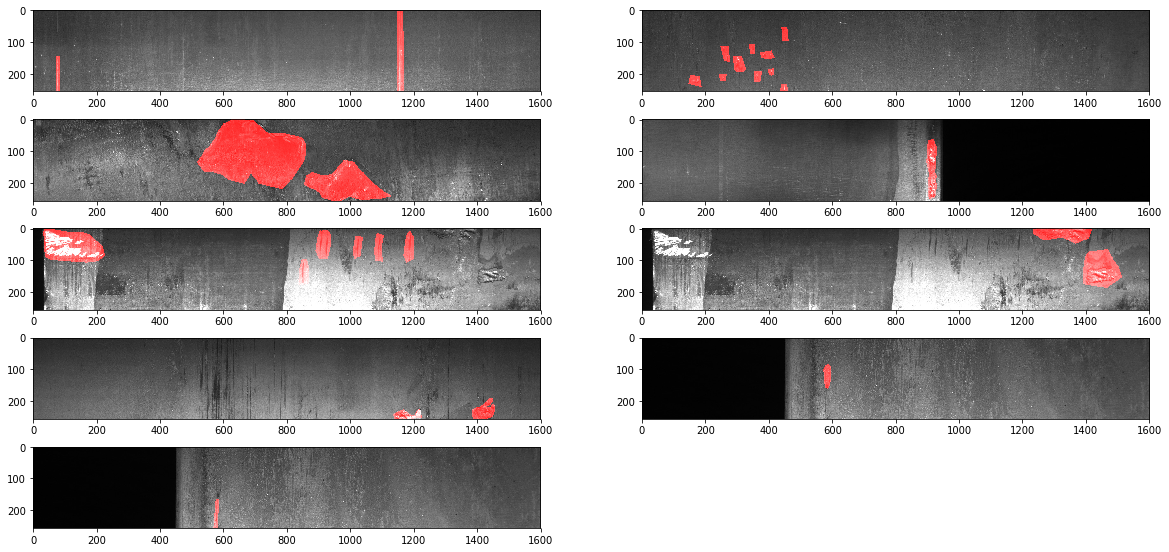

In [58]:
def rle2mask(rle, imgshape):
    #width & height of steel image
    width = imgshape[0]    
    height= imgshape[1]
    
    #flatttened empty array with size of input image
    mask= np.zeros( width*height ).astype(np.uint8)
    #convert all elements of encoded image pixels to int values
    array = np.asarray([int(x) for x in rle.split()])
    
    #splitting the encoded pixels
    #every odd index of encoded array is the start pixel &
    #every even index of encoded array is the length of the mask from start
    starts = array[0::2]
    lengths = array[1::2]
    
    #expanding the encoded pixel
    #current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
        #current_position += lengths[index]
    
    #numpy operations to bring the shape of mask suitable to image
    return np.flipud( np.rot90( mask.reshape(height,width), k=1 ) )

#plotting variables
fig=plt.figure(figsize=(20,100))
columns = 2
rows = 50

for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fn = data_csv['ImageId'][i]
    #image file
    img = cv2.imread( '/home/abhigith/Desktop/steel_defect_dataset/train_images/'+fn )
    #image BGR --> RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #generating mask from encoded pixels
    mask = rle2mask( data_csv['EncodedPixels'][i], img.shape  )
    #covering the image with generated mask
    img[mask==1,0] = 255
    plt.imshow(img)
    
plt.show()


In [45]:
x= np.random.randn(3,4)

In [46]:
x

array([[ 1.33697477, -0.51797581,  0.02871463, -0.50126552],
       [-0.52474534, -0.56186214,  1.66982844,  1.27908299],
       [ 0.30147725,  0.03657146, -0.67628289,  0.85130962]])

In [50]:
np.rot90(x)

array([[-0.50126552,  1.27908299,  0.85130962],
       [ 0.02871463,  1.66982844, -0.67628289],
       [-0.51797581, -0.56186214,  0.03657146],
       [ 1.33697477, -0.52474534,  0.30147725]])